# Sales Analysis                                                                           

### Import necessary libraries 

In [90]:
import pandas as pd 

import os

import matplotlib.pyplot as plt

import matplotlib.ticker as mticker

### Merge all 12 files & concat in a DataFrame

In [22]:
df = pd.read_csv(r"C:\Users\nadia\Downloads\Sales_Data\Sales_April_2019.csv")

path = r"C:\Users\nadia\Downloads\Sales_Data"

files = [file for file in os.listdir(r'C:\Users\nadia\Downloads\Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:

    df = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv('all_data.csv', index = False )
    

In [23]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Read from Updated DataFrame

In [24]:
all_data = pd.read_csv(r"C:\Users\nadia\Downloads\all_data.csv")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning up the data

In [25]:
## checking the total sum of nulls in each column 

all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [26]:

nan_df = all_data[all_data.isna().any(axis = 1)]

nan_df.head()

all_data = all_data.dropna(how ='all')

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [27]:

nan_df2 = all_data[all_data.isna().any(axis = 1)]
nan_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


### Q1. What was the best month for sales? How much was earned that month?

##### Adding a month column

In [28]:

all_data['Month']=all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",07
3,176560,Google Phone,1,600,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [29]:
all_data.Month.dtypes

dtype('O')

##### Converting object to integer

In [34]:

all_data['Month']=all_data['Month'].astype(str).astype(int)

In [35]:
all_data['Month'].dtypes

dtype('int32')

##### when converting found this error : invalid literal for int() with base 10: 'Or'. so finding 'Or' and deleting it

In [31]:
all_data[all_data['Month'].isin(['Or'])]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [32]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [33]:
all_data['Month'].dtypes

dtype('O')

##### Adding column Sales as 'Quantity Ordered * Price Each'

In [36]:
all_data['Quantity Ordered'].dtypes
all_data['Price Each'].dtypes

dtype('O')

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",7
3,176560,Google Phone,1,600,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Converting Quantity Ordered and Price Each from object to Int and Float

In [38]:

all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(str).astype(int)

In [39]:
all_data['Price Each']=all_data['Price Each'].astype(str).astype(float)

In [40]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99
3,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Result: 

In [41]:
Result = all_data.groupby('Month').sum()

range(1, 13)


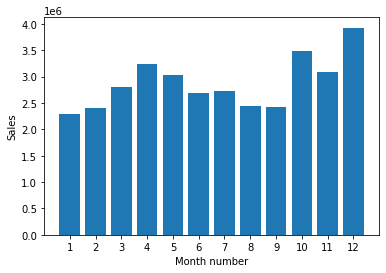

In [42]:

months= range(1,13)
print(months)

plt.bar(months,Result['Sales'])
plt.xticks(months)
plt.xlabel('Month number')
plt.ylabel('Sales')
plt.show()

### Q2. What city has the highest number of sales

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99
3,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Adding city column

In [44]:

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] =  all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x)+ ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Result:

In [45]:
result = all_data.groupby('City').sum()

result

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,102054,2795498.58
Austin (TX),11153,1809873.61,68428,1819581.75
Boston (MA),22528,3637409.77,137528,3661642.01
Dallas (TX),16730,2752627.82,101376,2767975.40
Los Angeles (CA),33289,5421435.23,202471,5452570.80
New York City (NY),27932,4635370.83,170626,4664317.43
Portland (ME),2750,447189.25,16601,449758.27
Portland (OR),11303,1860558.22,68813,1870732.34
San Francisco (CA),50239,8211461.74,306750,8262203.91


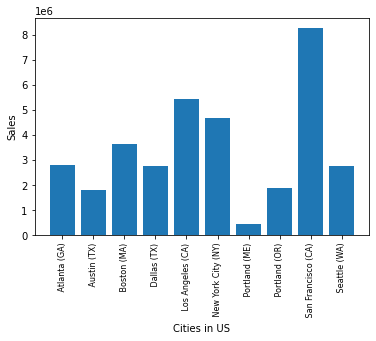

In [46]:

cities = [ city for city, df in all_data.groupby('City')]

plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation = 'vertical',size = 8)
plt.xlabel('Cities in US')
plt.ylabel('Sales')
plt.show()

### Q3. What time should we display advertisements to maximize likelihood of customer's buying product?

In [47]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,07/04/2019 22:30,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,12/04/2019 14:38,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


##### Converting Order Date column to pd.to_datetime() format

In [48]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


In [49]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


##### Adding Hour, Minute and Count columns

In [50]:
# Add hour column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


In [51]:
all_data.Hour.unique()

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

#### Result:

In [52]:
all_data.groupby('Hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


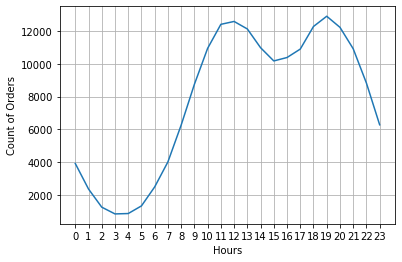

In [53]:
hours = [hour for hour , df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Count of Orders')
plt.grid()
plt.show()

### Q4. Which City should we display advertisements to maximize likelihood of customer's buying product?

In [54]:
all_data.groupby('City').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Hour,Minute,Count
City,,,,,,,,,,,
Atlanta (GA),14881,14881,14881,14881,14881,14881,14881,14881,14881,14881,14881
Austin (TX),9905,9905,9905,9905,9905,9905,9905,9905,9905,9905,9905
Boston (MA),19934,19934,19934,19934,19934,19934,19934,19934,19934,19934,19934
Dallas (TX),14820,14820,14820,14820,14820,14820,14820,14820,14820,14820,14820
Los Angeles (CA),29605,29605,29605,29605,29605,29605,29605,29605,29605,29605,29605
New York City (NY),24876,24876,24876,24876,24876,24876,24876,24876,24876,24876,24876
Portland (ME),2455,2455,2455,2455,2455,2455,2455,2455,2455,2455,2455
Portland (OR),10010,10010,10010,10010,10010,10010,10010,10010,10010,10010,10010
San Francisco (CA),44732,44732,44732,44732,44732,44732,44732,44732,44732,44732,44732


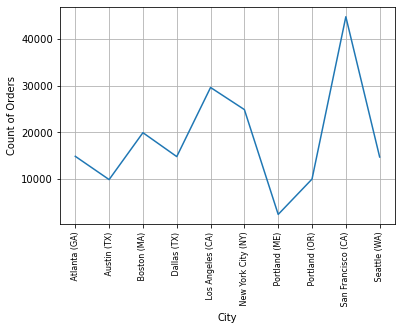

In [55]:
cities = [city for city , df in all_data.groupby(['City'])]

plt.plot(cities, all_data.groupby(['City']).count()['Count'])
plt.xticks(cities,rotation = 'vertical',size = 8)
plt.xlabel('City')
plt.ylabel('Count of Orders')
plt.grid()
plt.show()

### Q5. What products are most often sold together?

In [56]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [57]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


##### Storing the duplicated data to a new data frame, then grouping them with Order ID & joining them with ',' ,finally once the data frame shows the desired output we will drop the duplicates as its not necessary anymore.

In [58]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()



,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


##### Result:

In [59]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    


for key, value in count.most_common(10):
        print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q6.What product sold the most? why do you think it sold the most?

In [61]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-07-04 22:30:00,"682 Chestnut St, Boston, MA 02215",7,99.99,Boston (MA),22,30,1
3,176560,Google Phone,1,600.00,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,600.00,Los Angeles (CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-12-04 14:38:00,"669 Spruce St, Los Angeles, CA 90001",12,11.99,Los Angeles (CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27,1


##### Result:

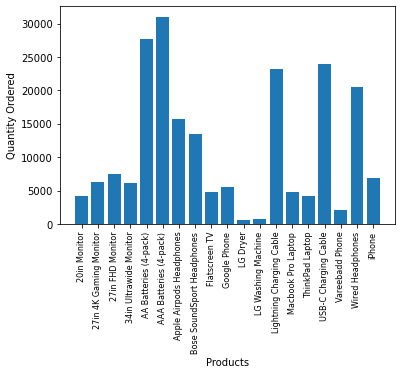

In [81]:
product_group = all_data.groupby('Product')

quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation = 'vertical',size = 8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

##### Adding a y-axis(Price) label to secondary y-axis (Quantity Ordered) to display the proof of why the AAA battery was sold mostly.

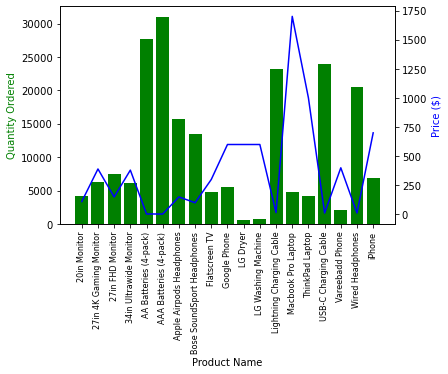

In [94]:
import warnings
warnings.filterwarnings("ignore")

prices = all_data.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()
